In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [4]:
file_path = "cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,ID,interview_date,country,NPS,translated_comment,customer_type,comment_length,translated_comment_preprocessed
0,1,2022-05-11,Germany,0.0,My mother's contract change did not go through...,detractors,618,mothers contract change not go expected bank d...
1,2,2022-07-19,Poland,0.0,ebok does not work - no access to invoices,detractors,42,ebok not work no access invoices
2,3,2022-12-14,Italy,8.0,I WOULD NOT KNOW. BECAUSE I HAVE ALWAYS FOUND ...,passives,129,would not know always found well eon output pr...
3,4,2022-08-04,Germany,10.0,Service is always available by phone and you g...,promoters,54,service always available phone get help
4,5,2022-08-15,Poland,9.0,"Professionalism, competence and employee culture",promoters,48,professionalism competence employee culture


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495070 entries, 0 to 495069
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               495070 non-null  int64  
 1   interview_date                   495070 non-null  object 
 2   country                          495070 non-null  object 
 3   NPS                              495070 non-null  float64
 4   translated_comment               495070 non-null  object 
 5   customer_type                    495070 non-null  object 
 6   comment_length                   495070 non-null  int64  
 7   translated_comment_preprocessed  491865 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 30.2+ MB


In [24]:
df = df.dropna(subset=["translated_comment_preprocessed"])

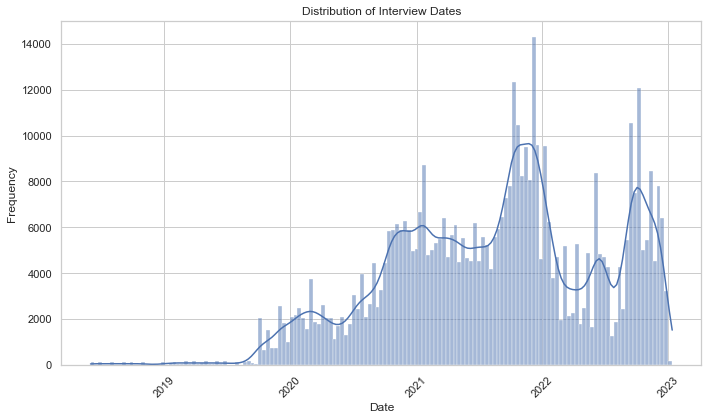

(count                           495070
 mean     2021-08-17 12:34:40.636677120
 min                2018-06-01 00:00:00
 25%                2021-01-12 00:00:00
 50%                2021-09-21 00:00:00
 75%                2022-04-07 00:00:00
 max                2023-01-12 00:00:00
 Name: interview_date, dtype: object,
 None)

In [10]:
# Analysis of 'interview_date'
# Descriptive statistics for the 'interview_date' column
# df = df[df['interview_date'] > '2019-10-01']
df['interview_date'] = pd.to_datetime(df['interview_date'])
date_description = df['interview_date'].describe(datetime_is_numeric=True)

# Plotting the distribution of interview dates
plt.figure(figsize=(10, 6))
sns.histplot(df['interview_date'], kde=True)
plt.title('Distribution of Interview Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

date_description, plt.show()

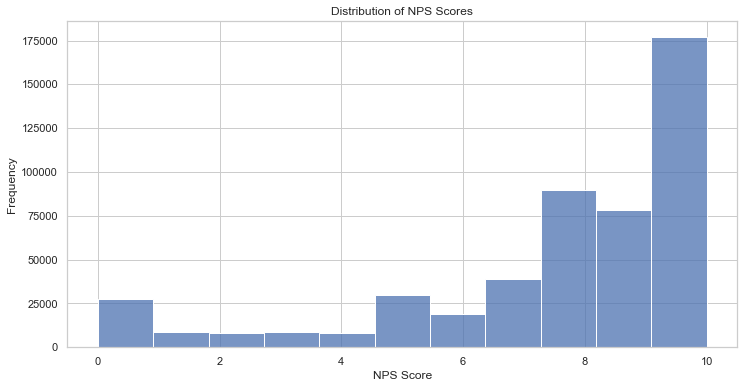

In [11]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of NPS scores
plt.figure(figsize=(12, 6))
sns.histplot(df['NPS'], bins=11, kde=False)
plt.title('Distribution of NPS Scores')
plt.xlabel('NPS Score')
plt.ylabel('Frequency')
plt.show()


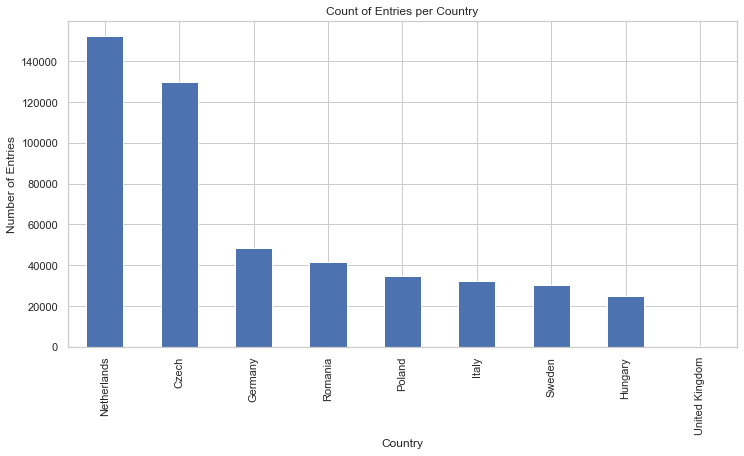

In [12]:
# Count of entries per country
country_counts = df['country'].value_counts().nlargest(12)

# Plotting the country counts
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Count of Entries per Country')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.show()

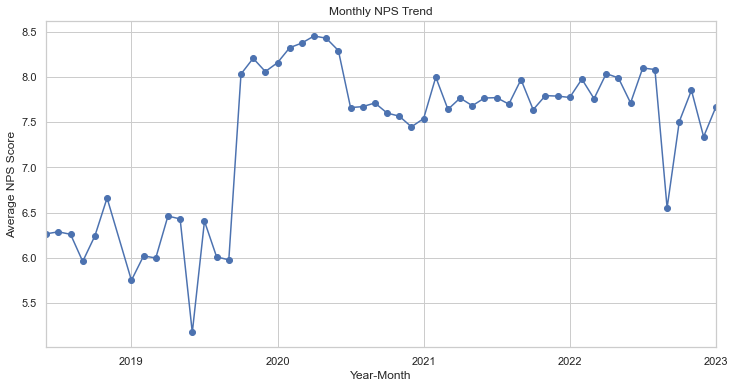

In [13]:

# Analyzing NPS trend over time
# Grouping by month and year for trend analysis
df['year_month'] = df['interview_date'].dt.to_period('M')
monthly_nps_trend = df.groupby('year_month')['NPS'].mean()

# Plotting the NPS trend over time
plt.figure(figsize=(12, 6))
monthly_nps_trend.plot(kind='line', marker='o')
plt.title('Monthly NPS Trend')
plt.xlabel('Year-Month')
plt.ylabel('Average NPS Score')
plt.show()


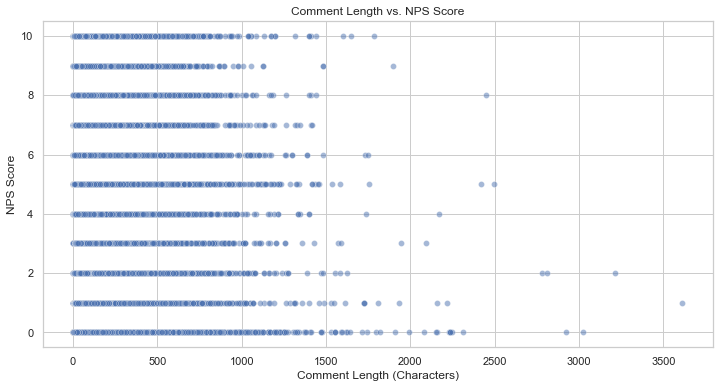

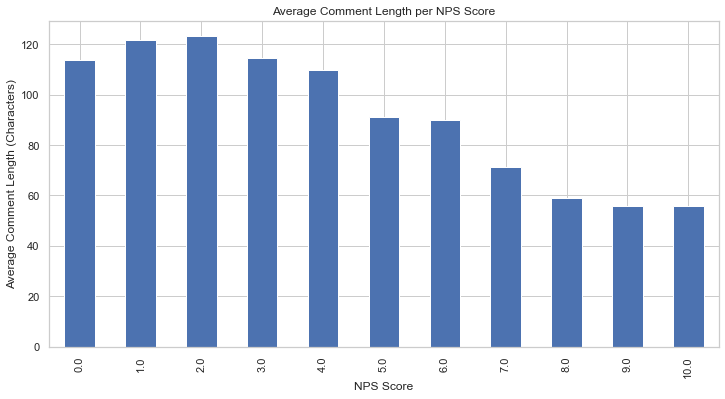

In [14]:
# Analyzing comment lengths and their relation to NPS scores

# Plotting the relationship between comment length and NPS score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='comment_length', y='NPS', alpha=0.5)
plt.title('Comment Length vs. NPS Score')
plt.xlabel('Comment Length (Characters)')
plt.ylabel('NPS Score')
plt.show()

# Calculating the average comment length for each NPS score
average_comment_length_per_nps = df.groupby('NPS')['comment_length'].mean()

# Plotting the average comment length per NPS score
plt.figure(figsize=(12, 6))
average_comment_length_per_nps.plot(kind='bar')
plt.title('Average Comment Length per NPS Score')
plt.xlabel('NPS Score')
plt.ylabel('Average Comment Length (Characters)')
plt.show()


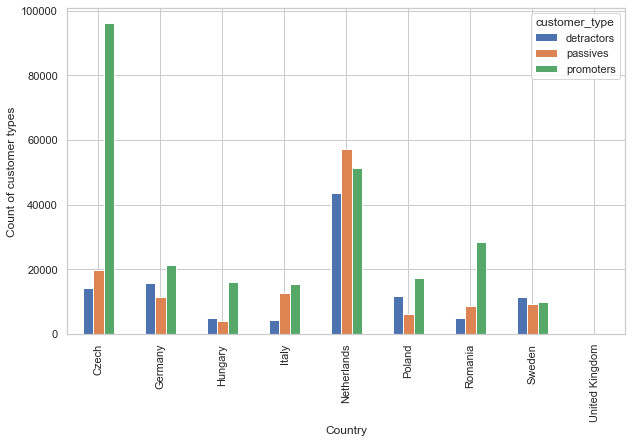

In [15]:
# Create a cross-tabulation of customer types per country
df_cross = pd.crosstab(index=df['country'], columns=df['customer_type'])

# Plot a grouped bar chart using the cross-tabulated DataFrame
ax = df_cross.plot(kind='bar')
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 6)
# Change the axes labels
ax.set_xlabel("Country")
ax.set_ylabel("Count of customer types")

# Show the plot
plt.show()
